In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

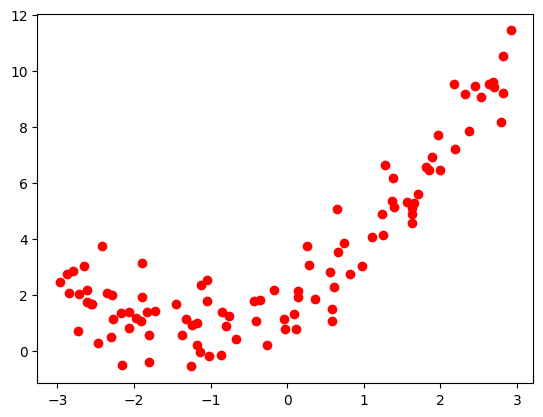

In [ ]:
np.random.seed(42)
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color='r')

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)


array([[-1.3890576 ],
       [ 1.46524586],
       [ 1.04433772],
       [ 0.66758691],
       [-0.71873094],
       [-0.09595758],
       [-0.60416768],
       [ 1.35631637],
       [-1.53661565],
       [-0.32124882],
       [-0.12413934],
       [ 0.47881255],
       [ 1.19272947],
       [ 1.65086383],
       [-1.19664883],
       [-1.07157948],
       [ 1.04099188],
       [-1.3530511 ],
       [ 1.25103735],
       [-1.02177243]])

In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(x_train,y_train)
y_hat=regression.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_hat)
print("R square:",score)

R square: 0.6870833008069619


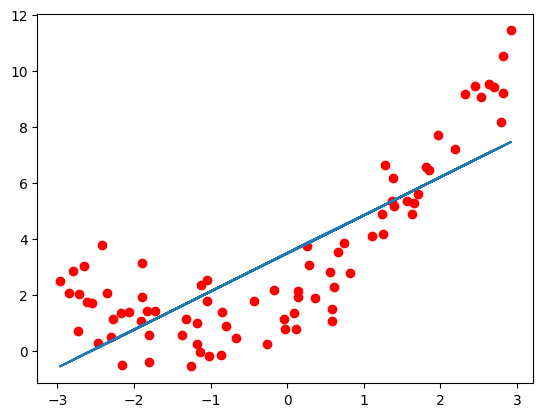

In [20]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,regression.predict(x_train))

we can see that out best fit line is not suitable for the non linear relationshib between the features

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [30]:
x_train_poly

array([[ 1.00000000e+00,  2.53124541e+00,  6.40720333e+00],
       [ 1.00000000e+00,  2.32327646e+00,  5.39761349e+00],
       [ 1.00000000e+00, -1.80195731e+00,  3.24705014e+00],
       [ 1.00000000e+00, -2.79366887e+00,  7.80458577e+00],
       [ 1.00000000e+00,  2.92132162e+00,  8.53412001e+00],
       [ 1.00000000e+00, -1.89957294e+00,  3.60837736e+00],
       [ 1.00000000e+00, -2.26777059e+00,  5.14278345e+00],
       [ 1.00000000e+00,  1.36396976e-01,  1.86041351e-02],
       [ 1.00000000e+00,  1.24843547e+00,  1.55859111e+00],
       [ 1.00000000e+00, -2.96686730e+00,  8.80230156e+00],
       [ 1.00000000e+00,  2.81945911e+00,  7.94934969e+00],
       [ 1.00000000e+00,  1.20408127e-01,  1.44981171e-02],
       [ 1.00000000e+00, -1.04890007e+00,  1.10019135e+00],
       [ 1.00000000e+00,  5.54487413e-01,  3.07456291e-01],
       [ 1.00000000e+00,  3.67663185e-01,  1.35176218e-01],
       [ 1.00000000e+00, -2.06403288e+00,  4.26023172e+00],
       [ 1.00000000e+00, -2.15445465e+00

In [31]:
regression.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
print("Coefficients :",regression.coef_)
print("Bias :",regression.intercept_)

Coefficients : [[0.         1.44285051 0.56726223]]
Bias : [1.73625819]


predicted realtion : " y = 0.56726223 * x^2 + 1.44285051 * x + 1.73625819"
<br>orignal tranformation used :" y = 0.5 * x**2 + 1.5 * x + 2 + np.random.randn(100,1)"

In [34]:
y_pred=regression.predict(x_test_poly)

In [35]:
r2=r2_score(y_test,y_pred)
print('R2 :',r2)

R2 : 0.9214894267194649


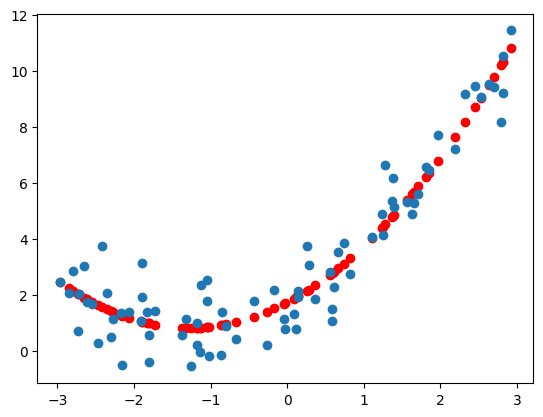

In [43]:
plt.scatter(x_train,regression.predict(x_train_poly),color='r')
plt.scatter(x_train,y_train)

In [44]:
# 3 prdiction of new data set
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=regression.predict(x_new_poly)

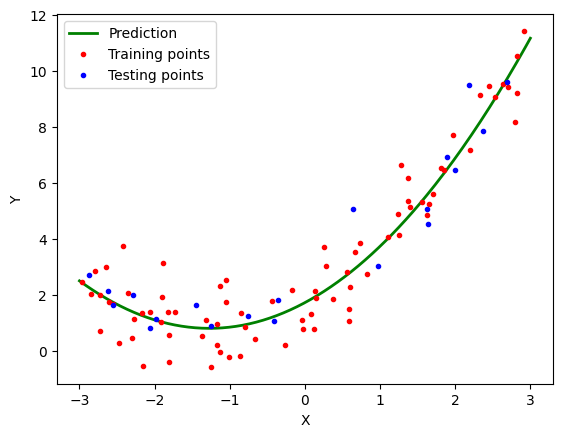

In [52]:
plt.plot(x_new,y_new,'g-',linewidth=2,label='Prediction')
plt.plot(x_train,y_train,'r.',label='Training points')
plt.plot(x_test,y_test,'b.',label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Pipelineing concepts

In [53]:
from sklearn.pipeline import Pipeline

In [60]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(x_new)
    
 
    
    #plotting prediction line
    plt.plot(x_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

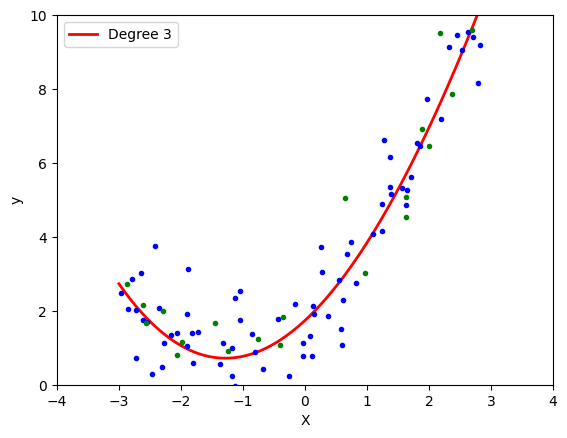

In [67]:
poly_regression(3)